In [2]:
import xarray as xr

In [3]:
filename = "merge_2019.nc"

In [4]:
ds = xr.open_dataset(filename)
print("Loaded dataset:", filename)

Loaded dataset: merge_2019.nc


In [5]:
print("\nVariables and descriptions:")
for var_name, var_da in ds.data_vars.items():
    desc = var_da.attrs.get('long_name') or var_da.attrs.get('standard_name') \
           or var_da.attrs.get('description') or "No description available"
    print(f" - {var_name}: {desc}")


Variables and descriptions:
 - time_bnds: No description available
 - precipitationCal: Daily accumulated precipitation (combined microwave-IR) estimate
 - HQprecipitation: Daily accumulated High Quality precipitation from all available MW sources
 - precipitationCal_cnt: Count of all valid half-hourly precipitationCal retrievals for the day
 - randomError: Daily total error of precipitation estimate
 - randomError_cnt: Count of valid half-hourly randomError retrievals for the day
 - precipitationCal_cnt_cond: Count of valid half-hourly precipitationCal retrievals for the day where precipitation is greater than 0
 - HQprecipitation_cnt: Count of all valid half-hourly HQprecipitation retrievals for the day
 - HQprecipitation_cnt_cond: Count of valid half-hourly HQprecipitation retrievals for the day where precipitation is greater than 0


In [6]:
lat_name = None
lon_name = None
for coord in ds.coords:
    name_lower = coord.lower()
    if 'lat' in name_lower:
        lat_name = coord
    if 'lon' in name_lower:
        lon_name = coord
if lat_name and lon_name:
    lat_vals = ds[lat_name]
    lon_vals = ds[lon_name]
    lat_min = float(lat_vals.min())
    lat_max = float(lat_vals.max())
    lon_min = float(lon_vals.min())
    lon_max = float(lon_vals.max())
    print(f"\nGeographic region covered by data:")
    print(f" - Latitude range:  {lat_min:.4f} to {lat_max:.4f}")
    print(f" - Longitude range: {lon_min:.4f} to {lon_max:.4f}")
else:
    print("\nError: Latitude/Longitude coordinates not found in the dataset.")


Geographic region covered by data:
 - Latitude range:  4.9500 to 39.9500
 - Longitude range: 60.0500 to 100.0500


In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

In [8]:
print(ds['time'].values)
print(len(ds['time']), len(set(ds['time'].values)))


['2019-06-02T00:00:00.000000000' '2019-06-03T00:00:00.000000000'
 '2019-06-04T00:00:00.000000000' '2019-06-05T00:00:00.000000000'
 '2019-06-06T00:00:00.000000000' '2019-06-07T00:00:00.000000000'
 '2019-06-08T00:00:00.000000000' '2019-06-09T00:00:00.000000000'
 '2019-06-10T00:00:00.000000000' '2019-06-11T00:00:00.000000000'
 '2019-06-12T00:00:00.000000000' '2019-06-13T00:00:00.000000000'
 '2019-06-14T00:00:00.000000000' '2019-06-15T00:00:00.000000000'
 '2019-06-16T00:00:00.000000000' '2019-06-17T00:00:00.000000000'
 '2019-06-18T00:00:00.000000000' '2019-06-19T00:00:00.000000000'
 '2019-06-20T00:00:00.000000000' '2019-06-21T00:00:00.000000000'
 '2019-06-22T00:00:00.000000000' '2019-06-23T00:00:00.000000000'
 '2019-06-24T00:00:00.000000000' '2019-06-25T00:00:00.000000000'
 '2019-06-27T00:00:00.000000000' '2019-06-28T00:00:00.000000000'
 '2019-06-29T00:00:00.000000000' '2019-06-30T00:00:00.000000000'
 '2019-07-01T00:00:00.000000000' '2019-07-03T00:00:00.000000000'
 '2019-07-04T00:00:00.000

In [9]:
_, index = np.unique(ds['time'], return_index=True)
ds = ds.isel(time=index)

In [10]:
rainfall = ds['precipitationCal'].sel(time='2019-06-10')

In [11]:
date_of_interest = '2019-06-18'
rainfall = ds['precipitationCal'].sel(time=date_of_interest)

In [12]:
print("Rainfall min:", rainfall.min().values)
print("Rainfall max:", rainfall.max().values)




Rainfall min: 0.0
Rainfall max: 297.39737


In [13]:
date_of_interest = '2019-06-18'
rainfall = ds['precipitationCal'].sel(time=date_of_interest)

print("Rainfall min:", rainfall.min().values)
print("Rainfall max:", rainfall.max().values)


Rainfall min: 0.0
Rainfall max: 297.39737


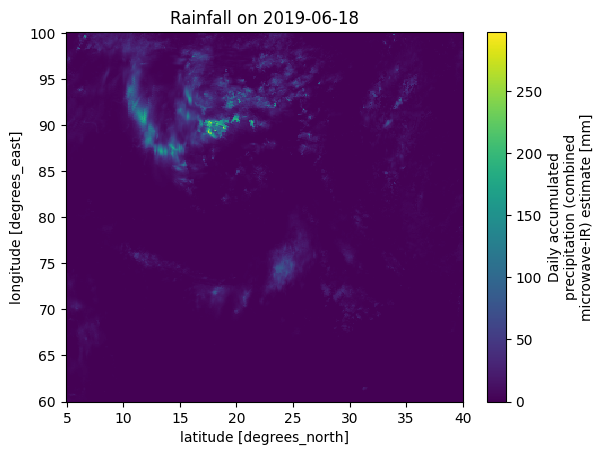

In [27]:
rainfall.plot()
plt.title(f"Rainfall on {date_of_interest}")
plt.show()


In [28]:
convective = rainfall.where(rainfall > 50)
stratiform = rainfall.where((rainfall > 0) & (rainfall <= 50))


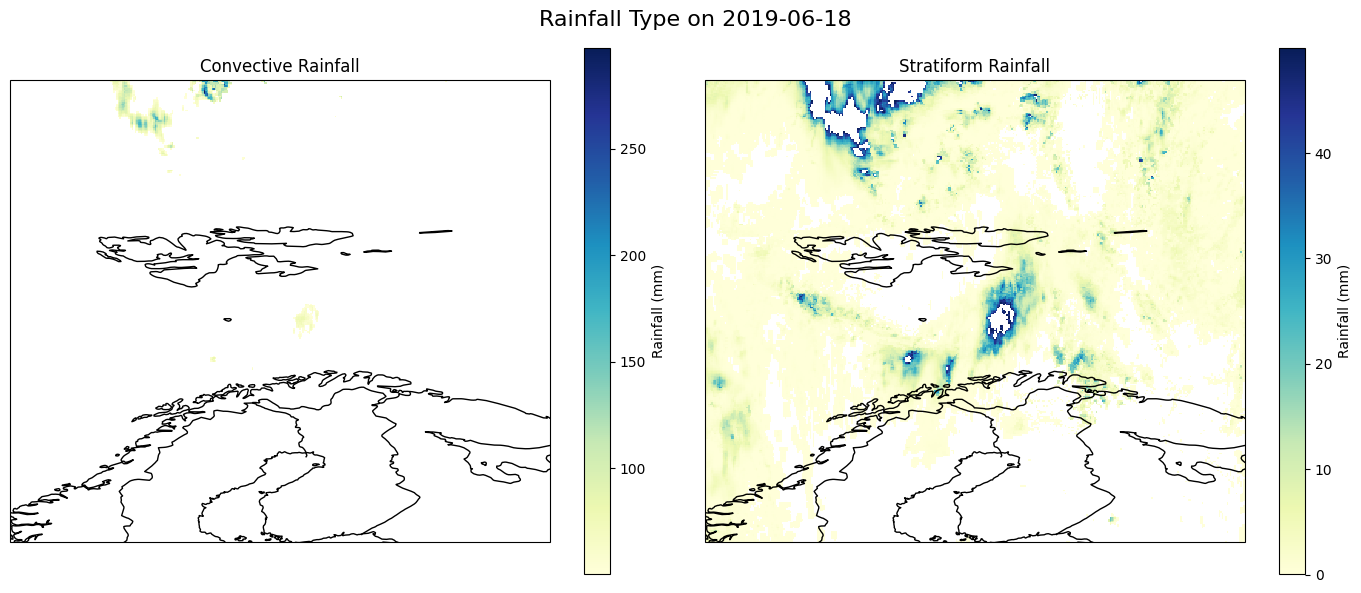

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'projection': ccrs.PlateCarree()})

for ax, data, title in zip(axs, [convective, stratiform], ['Convective Rainfall', 'Stratiform Rainfall']):
    im = data.plot(
        ax=ax,
        cmap='YlGnBu',
        cbar_kwargs={'label': 'Rainfall (mm)'},
        transform=ccrs.PlateCarree()
    )
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    # ax.set_extent([60, 100, 0, 40], crs=ccrs.PlateCarree())
    ax.set_title(title)

plt.suptitle(f"Rainfall Type on {date_of_interest}", fontsize=16)
plt.tight_layout()
plt.show()

In [30]:
print("Convective non-NaNs:", convective.count().values)
print("Stratiform non-NaNs:", stratiform.count().values)


Convective non-NaNs: 3075
Stratiform non-NaNs: 94817


In [33]:
print(rainfall)


<xarray.DataArray 'precipitationCal' (lon: 401, lat: 351)> Size: 563kB
array([[1.184757e+00, 1.740172e+00, 5.174497e+00, ..., 1.271273e-02,
        2.472990e-02, 5.000000e-03],
       [3.902849e+00, 5.197359e+00, 5.060313e+00, ..., 1.931459e-02,
        3.192546e-02, 3.678263e-03],
       [5.170628e+00, 4.256531e+00, 3.630659e+00, ..., 2.848934e-02,
        2.861114e-02, 1.831020e-03],
       ...,
       [5.392048e-02, 1.920234e-01, 1.257458e-01, ..., 1.550556e-01,
        8.469258e-02, 4.587558e-02],
       [1.139086e-03, 1.231444e-04, 2.550756e-02, ..., 1.557459e-01,
        4.364334e-01, 1.777301e-01],
       [2.932718e-03, 2.793065e-04, 1.106948e-01, ..., 6.008294e-01,
        8.844088e-01, 3.714957e-01]], dtype=float32)
Coordinates:
  * lon      (lon) float32 2kB 60.05 60.15 60.25 60.35 ... 99.85 99.95 100.1
  * lat      (lat) float32 1kB 4.95 5.05 5.15 5.25 ... 39.65 39.75 39.85 39.95
    time     datetime64[ns] 8B 2019-06-18
Attributes:
    long_name:     Daily accumulated preci

In [36]:
# Fix the orientation to (lat, lon)
rainfall = rainfall.transpose('lat', 'lon')
# Your data has shape (lon: 401, lat: 351), but you're likely plotting as if it were (lat, lon).




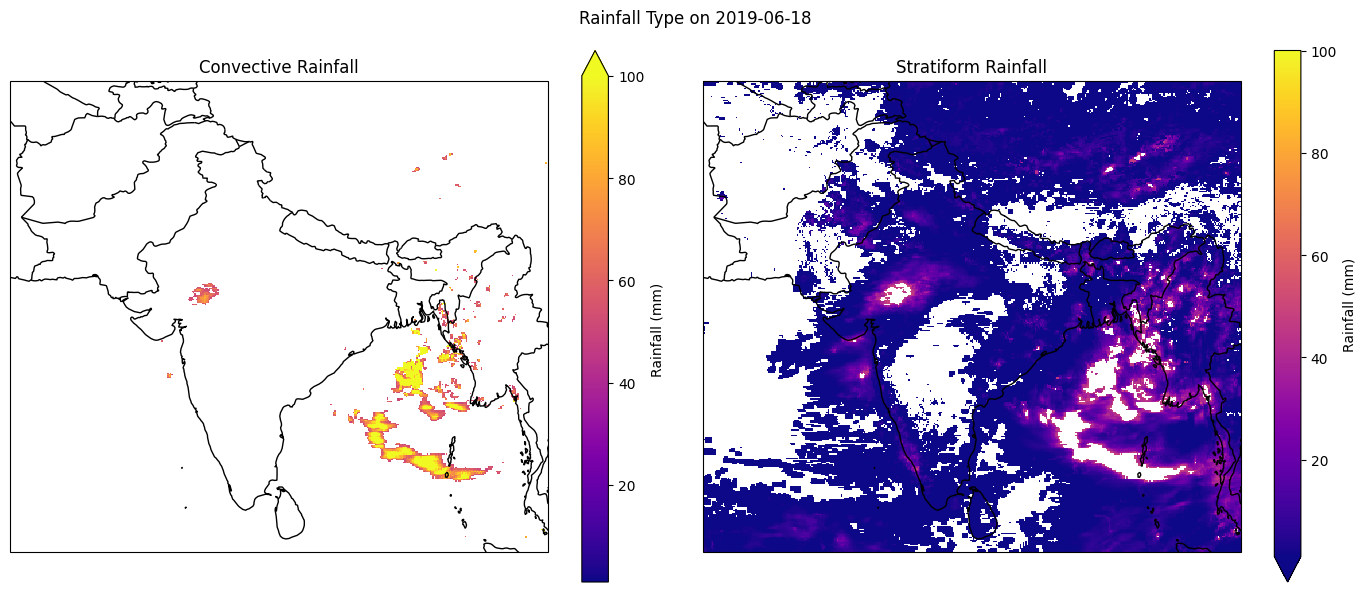

In [48]:
# Transpose
rainfall = rainfall.transpose('lat', 'lon')

# Threshold
convective = rainfall.where(rainfall > 50)
stratiform = rainfall.where((rainfall > 0) & (rainfall <= 50))

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'projection': ccrs.PlateCarree()})

for ax, data, title in zip(axs, [convective, stratiform], ['Convective Rainfall', 'Stratiform Rainfall']):
    im = data.plot(
        ax=ax,
        cmap='plasma',
        vmin=1, vmax=100,
        cbar_kwargs={'label': 'Rainfall (mm)'},
        transform=ccrs.PlateCarree()
    )
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.set_extent([60, 100, 5, 40], crs=ccrs.PlateCarree())
    ax.set_title(title)

plt.suptitle("Rainfall Type on 2019-06-18")
plt.tight_layout()
plt.show()


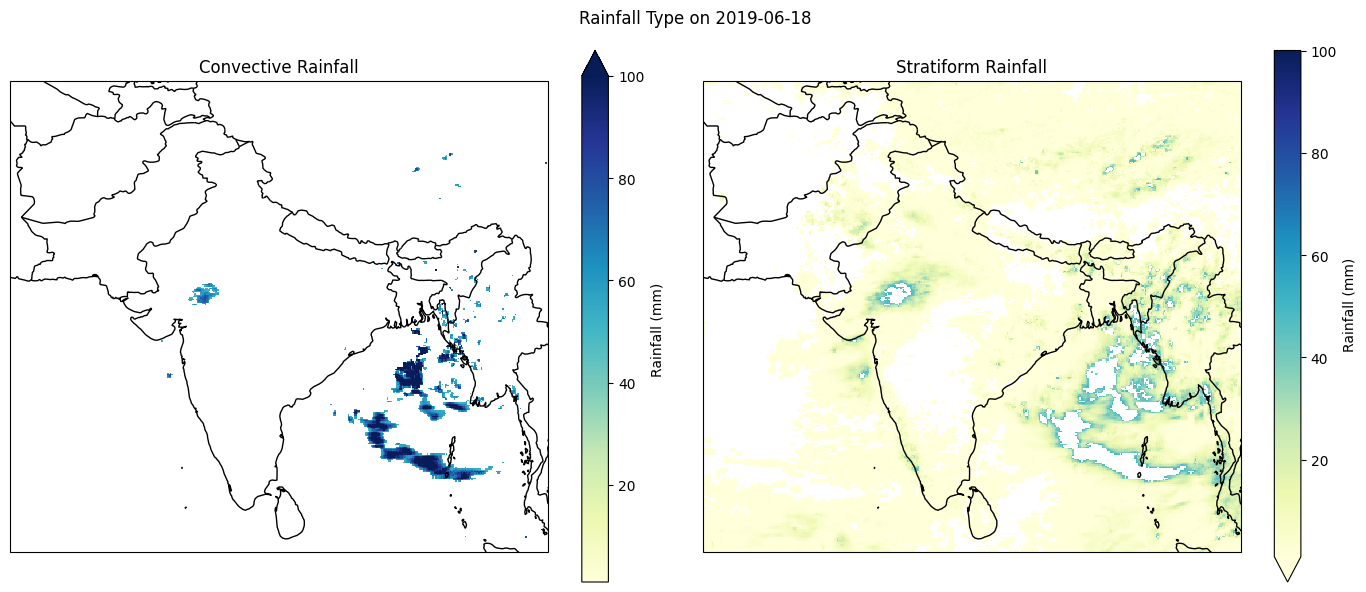

In [49]:
# Define rainfall types
convective = rainfall.where(rainfall > 50)
stratiform = rainfall.where((rainfall > 0) & (rainfall <= 50))

# Plot side-by-side maps
fig, axs = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'projection': ccrs.PlateCarree()})
for ax, data, title in zip(axs, [convective, stratiform], ['Convective Rainfall', 'Stratiform Rainfall']):
    im = data.plot(
        ax=ax,
        cmap='YlGnBu',
        vmin=1, vmax=100,
        cbar_kwargs={'label': 'Rainfall (mm)'},
        transform=ccrs.PlateCarree()
    )
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.set_extent([60, 100, 5, 40], crs=ccrs.PlateCarree())
    ax.set_title(title)
plt.suptitle(f"Rainfall Type on {date_of_interest}")
plt.tight_layout()
plt.show()



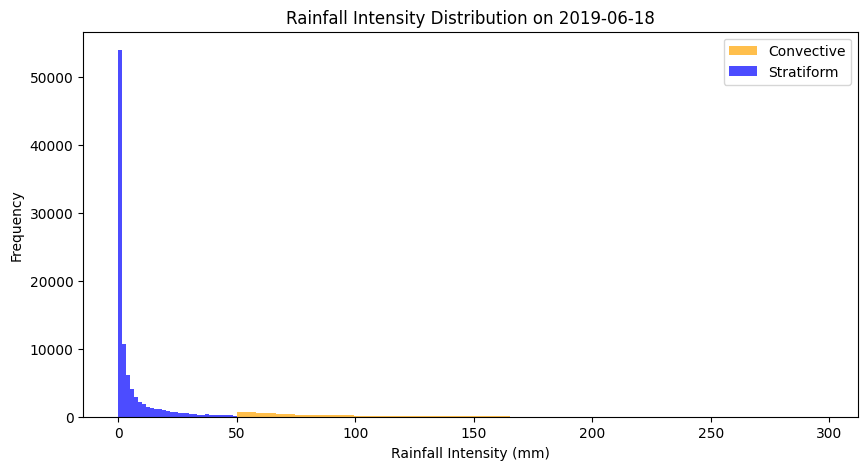

In [50]:
import numpy as np

# Flatten and remove NaNs for histogram
convective_vals = convective.values.flatten()
stratiform_vals = stratiform.values.flatten()
convective_vals = convective_vals[~np.isnan(convective_vals)]
stratiform_vals = stratiform_vals[~np.isnan(stratiform_vals)]

plt.figure(figsize=(10, 5))
plt.hist(convective_vals, bins=30, alpha=0.7, label='Convective', color='orange')
plt.hist(stratiform_vals, bins=30, alpha=0.7, label='Stratiform', color='blue')
plt.xlabel('Rainfall Intensity (mm)')
plt.ylabel('Frequency')
plt.title(f'Rainfall Intensity Distribution on {date_of_interest}')
plt.legend()
plt.show()


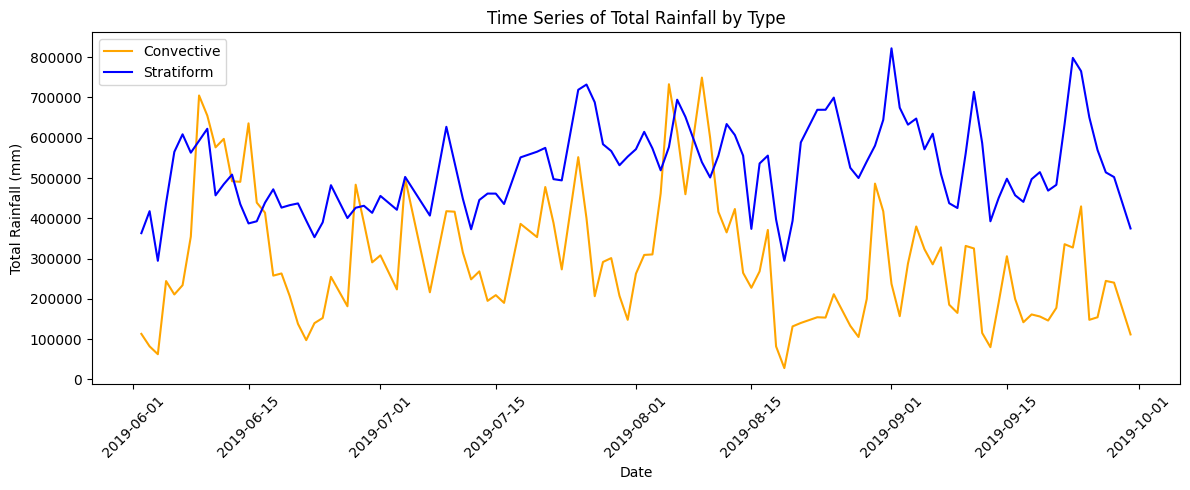

In [51]:
dates = ds['time'].values
total_convective = []
total_stratiform = []

for t in dates:
    rain = ds['precipitationCal'].sel(time=t)
    conv = rain.where(rain > 50)
    strat = rain.where((rain > 0) & (rain <= 50))
    total_convective.append(np.nansum(conv))
    total_stratiform.append(np.nansum(strat))

plt.figure(figsize=(12, 5))
plt.plot(dates, total_convective, label='Convective', color='orange')
plt.plot(dates, total_stratiform, label='Stratiform', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Rainfall (mm)')
plt.title('Time Series of Total Rainfall by Type')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


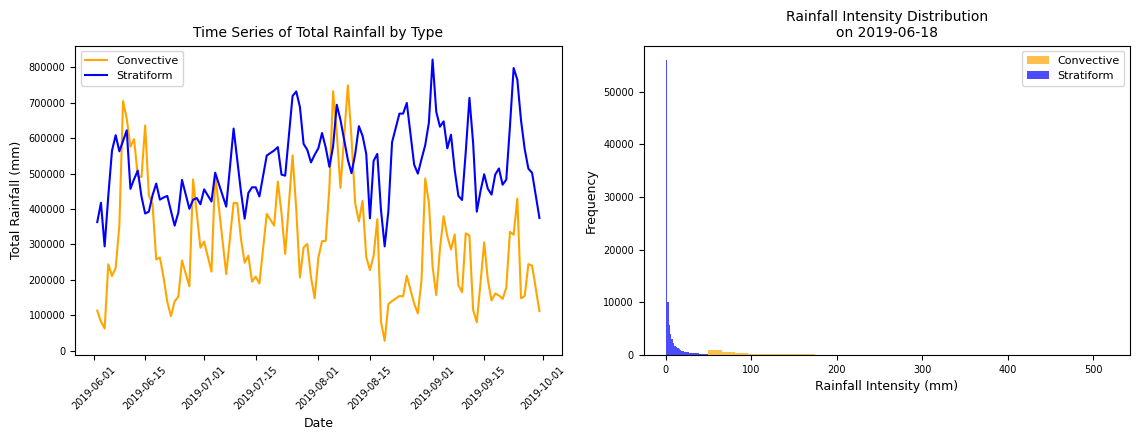

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# --- Time Series Data (already computed) ---
dates = ds['time'].values
total_convective = []
total_stratiform = []

for t in dates:
    rain = ds['precipitationCal'].sel(time=t)
    conv = rain.where(rain > 50)
    strat = rain.where((rain > 0) & (rain <= 50))
    total_convective.append(np.nansum(conv))
    total_stratiform.append(np.nansum(strat))

# --- Histogram Data (already computed for selected date) ---
# Make sure convective and stratiform are defined for the chosen date
convective_vals = convective.values.flatten()
stratiform_vals = stratiform.values.flatten()
convective_vals = convective_vals[~np.isnan(convective_vals)]
stratiform_vals = stratiform_vals[~np.isnan(stratiform_vals)]

# --- Plot both in a single row ---
fig, axs = plt.subplots(1, 2, figsize=(11.5, 4.5))  # A4 width, compact height

# Time Series Plot
axs[0].plot(dates, total_convective, label='Convective', color='orange')
axs[0].plot(dates, total_stratiform, label='Stratiform', color='blue')
axs[0].set_xlabel('Date', fontsize=9)
axs[0].set_ylabel('Total Rainfall (mm)', fontsize=9)
axs[0].set_title('Time Series of Total Rainfall by Type', fontsize=10)
axs[0].legend(fontsize=8)
axs[0].tick_params(axis='x', labelrotation=45, labelsize=7)
axs[0].tick_params(axis='y', labelsize=7)

# Histogram Plot
axs[1].hist(convective_vals, bins=30, alpha=0.7, label='Convective', color='orange')
axs[1].hist(stratiform_vals, bins=30, alpha=0.7, label='Stratiform', color='blue')
axs[1].set_xlabel('Rainfall Intensity (mm)', fontsize=9)
axs[1].set_ylabel('Frequency', fontsize=9)
axs[1].set_title(f'Rainfall Intensity Distribution\non {date_of_interest}', fontsize=10)
axs[1].legend(fontsize=8)
axs[1].tick_params(axis='both', labelsize=7)

plt.tight_layout()
plt.show()


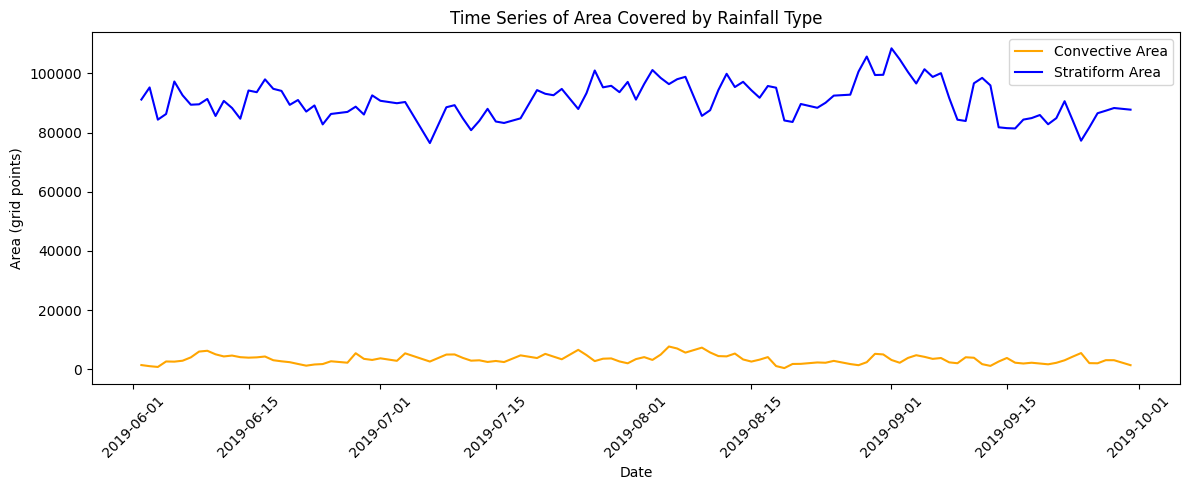

In [52]:
area_convective = []
area_stratiform = []

for t in dates:
    rain = ds['precipitationCal'].sel(time=t)
    conv = rain.where(rain > 50)
    strat = rain.where((rain > 0) & (rain <= 50))
    area_convective.append(np.count_nonzero(~np.isnan(conv)))
    area_stratiform.append(np.count_nonzero(~np.isnan(strat)))

plt.figure(figsize=(12, 5))
plt.plot(dates, area_convective, label='Convective Area', color='orange')
plt.plot(dates, area_stratiform, label='Stratiform Area', color='blue')
plt.xlabel('Date')
plt.ylabel('Area (grid points)')
plt.title('Time Series of Area Covered by Rainfall Type')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


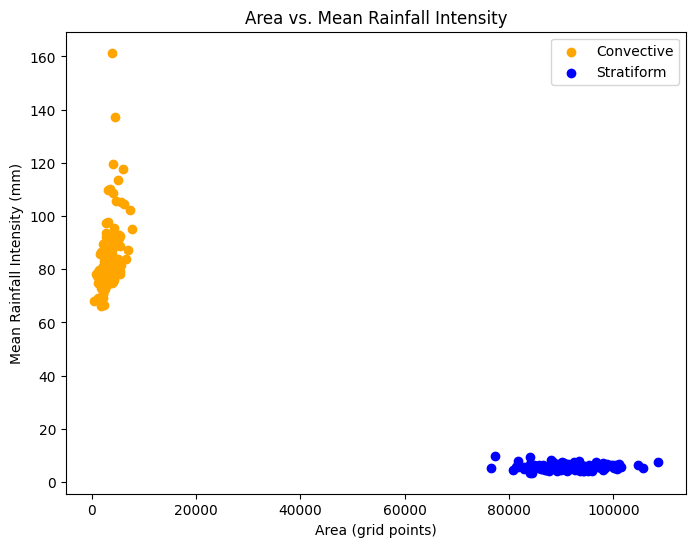

In [53]:
mean_convective = []
mean_stratiform = []

for t in dates:
    rain = ds['precipitationCal'].sel(time=t)
    conv = rain.where(rain > 50)
    strat = rain.where((rain > 0) & (rain <= 50))
    mean_convective.append(np.nanmean(conv))
    mean_stratiform.append(np.nanmean(strat))

plt.figure(figsize=(8, 6))
plt.scatter(area_convective, mean_convective, c='orange', label='Convective')
plt.scatter(area_stratiform, mean_stratiform, c='blue', label='Stratiform')
plt.xlabel('Area (grid points)')
plt.ylabel('Mean Rainfall Intensity (mm)')
plt.title('Area vs. Mean Rainfall Intensity')
plt.legend()
plt.show()


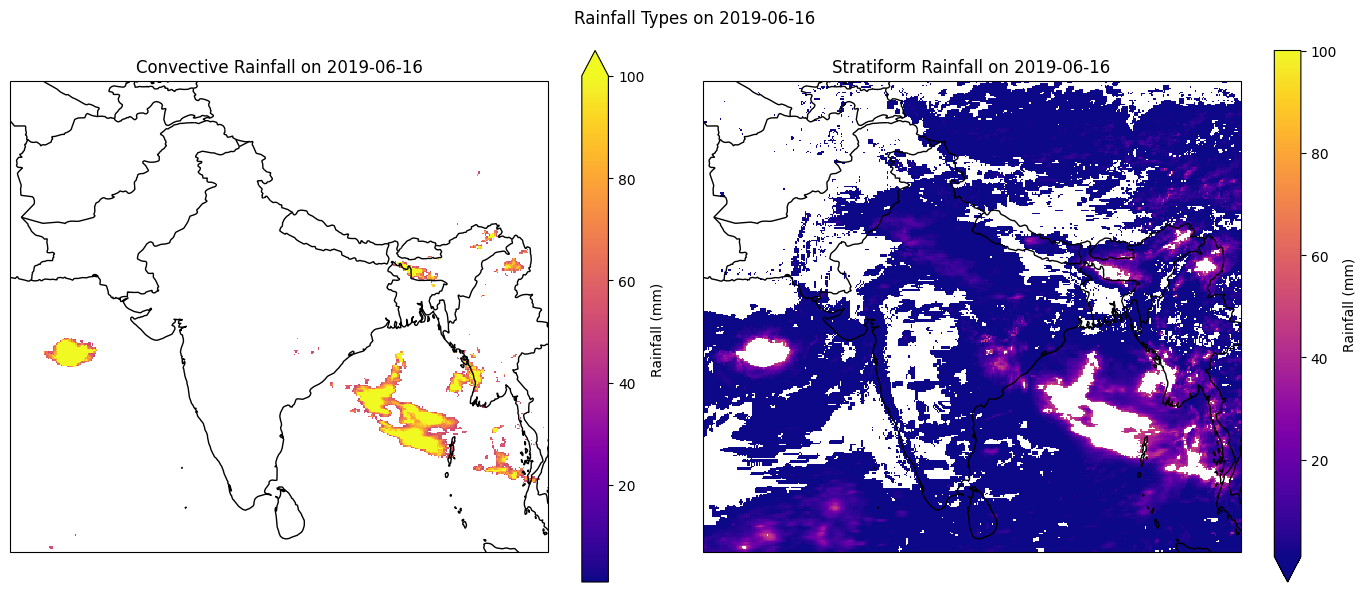

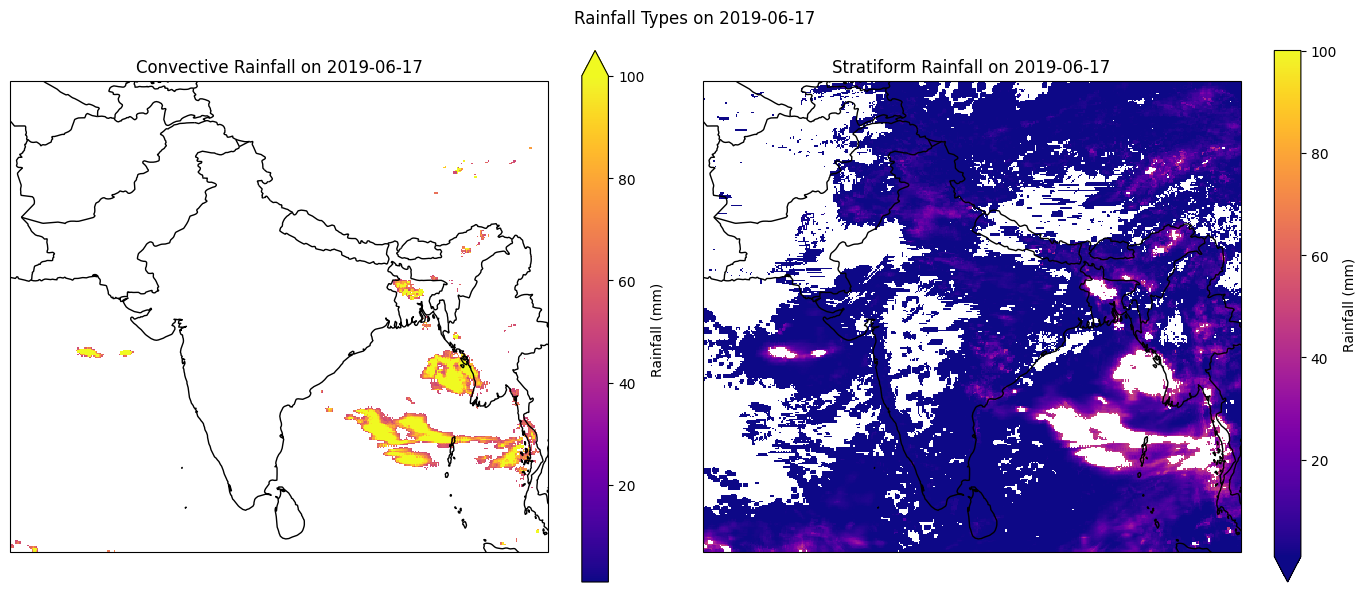

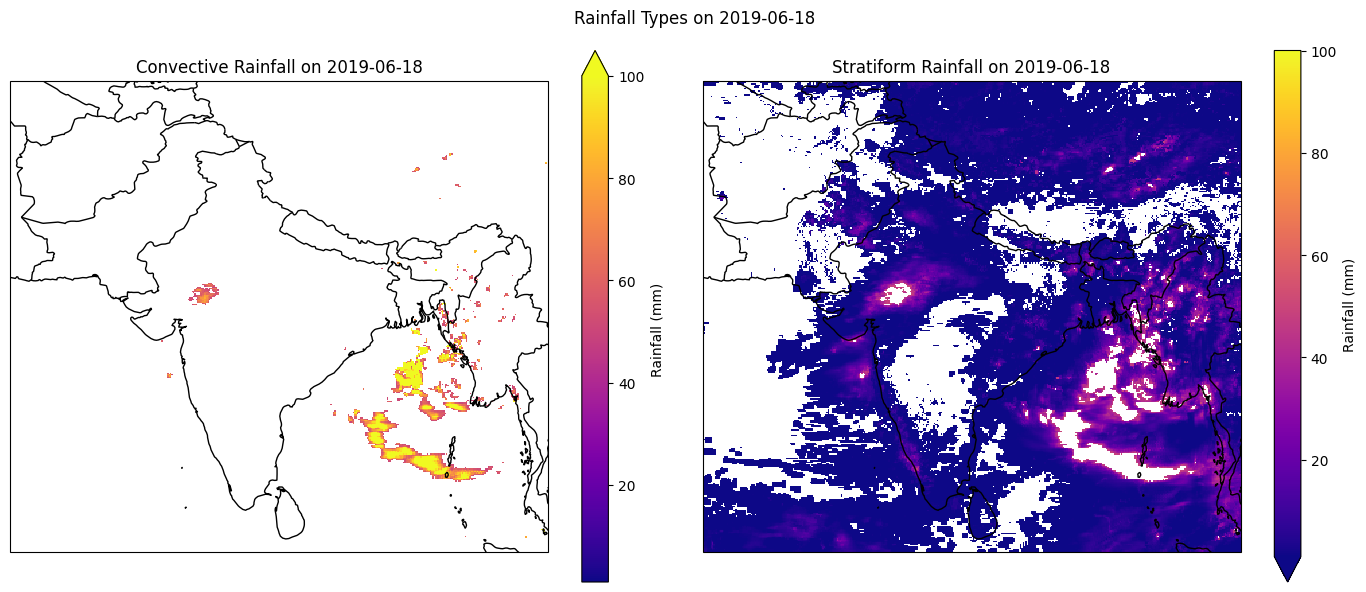

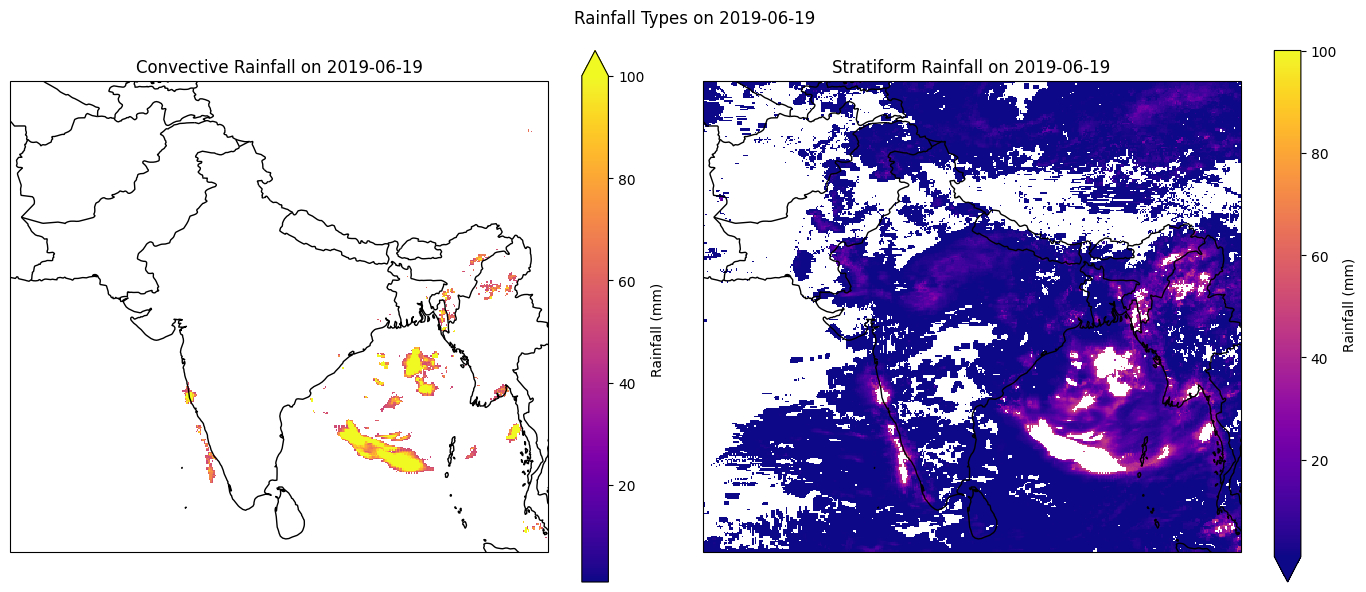

In [57]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# List of dates for key phases (replace with your actual dates)
phase_dates = ['2019-06-16', '2019-06-17', '2019-06-18', '2019-06-19']

for date in phase_dates:
    rainfall = ds['precipitationCal'].sel(time=date).transpose('lat', 'lon')
    convective = rainfall.where(rainfall > 50)
    stratiform = rainfall.where((rainfall > 0) & (rainfall <= 50))

    fig, axs = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    for ax, data, title in zip(axs, [convective, stratiform], ['Convective', 'Stratiform']):
        im = data.plot(
            ax=ax,
            cmap='plasma',
            vmin=1, vmax=100,
            cbar_kwargs={'label': 'Rainfall (mm)'},
            transform=ccrs.PlateCarree()
        )
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS)
        ax.set_extent([60, 100, 5, 40], crs=ccrs.PlateCarree())
        ax.set_title(f"{title} Rainfall on {date}")
    plt.suptitle(f"Rainfall Types on {date}")
    plt.tight_layout()
    plt.show()


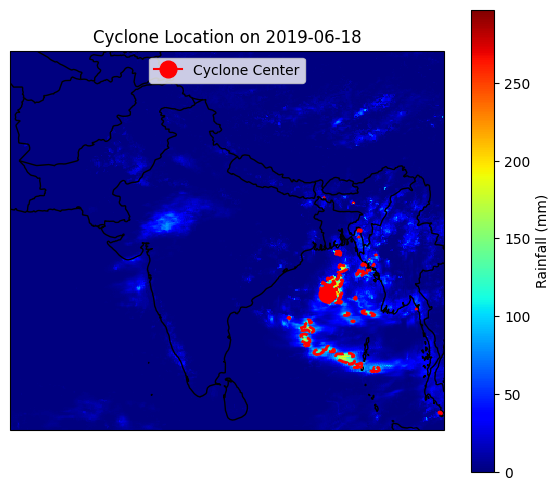

In [14]:
# Select the date of interest and extract rainfall data
date_of_interest = '2019-06-18'
rainfall = ds['precipitationCal'].sel(time=date_of_interest).transpose('lat', 'lon')

# Find cyclone center (maximum rainfall location)
max_idx = np.unravel_index(np.nanargmax(rainfall.values), rainfall.shape)
cyclone_lat = rainfall['lat'].values[max_idx[0]]
cyclone_lon = rainfall['lon'].values[max_idx[1]]

fig = plt.figure(figsize=(7, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot rainfall with 'jet' colormap (red for high values)
rain = ax.pcolormesh(
    rainfall['lon'], rainfall['lat'], rainfall,
    cmap='jet',  # 'jet' colormap includes red at high values
    vmin=0, vmax=np.nanmax(rainfall),
    shading='auto'
)
plt.colorbar(rain, ax=ax, label='Rainfall (mm)')

# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_extent([60, 100, 5, 40], crs=ccrs.PlateCarree())

# Mark the cyclone center with a red marker and label
ax.plot(cyclone_lon, cyclone_lat, marker='o', color='red', markersize=12, label='Cyclone Center')
ax.legend(loc='upper center')

# Optionally, draw a contour for very high rainfall (e.g., 100 mm)
contour = ax.contour(
    rainfall['lon'], rainfall['lat'], rainfall,
    levels=[100], colors='red', linewidths=2, linestyles='dashed'
)
ax.clabel(contour, fmt='%d mm', colors='red', fontsize=8)

plt.title(f'Cyclone Location on {date_of_interest}')
plt.show()